In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from ptemcee import default_beta_ladder
import bilby

from util import dpi_key_to_label, posterior_to_result, HYBRID_OVERLAP0_COLOR, COMP_COLOR, HYBRID_COLOR

plt.style.use("tgr-hybrid-sampling.mplstyle")

ntemps = 5
ndims = 54

# Compare posteriors

In [17]:
res_prior = posterior_to_result(
    hdfpath="./data/GW150914_results/150914_ptemcee_initialization_comparison_posterior.hdf5",
    key="prior"
)
res_maxlike = posterior_to_result(
    hdfpath="./data/GW150914_results/150914_ptemcee_initialization_comparison_posterior.hdf5",
    key = "maxlikelihood"
)
res_hybrid = posterior_to_result(
    hdfpath="./data/GW150914_results/150914_hybrid.hdf5",
    key="d_phi_2_no_overlap"
)

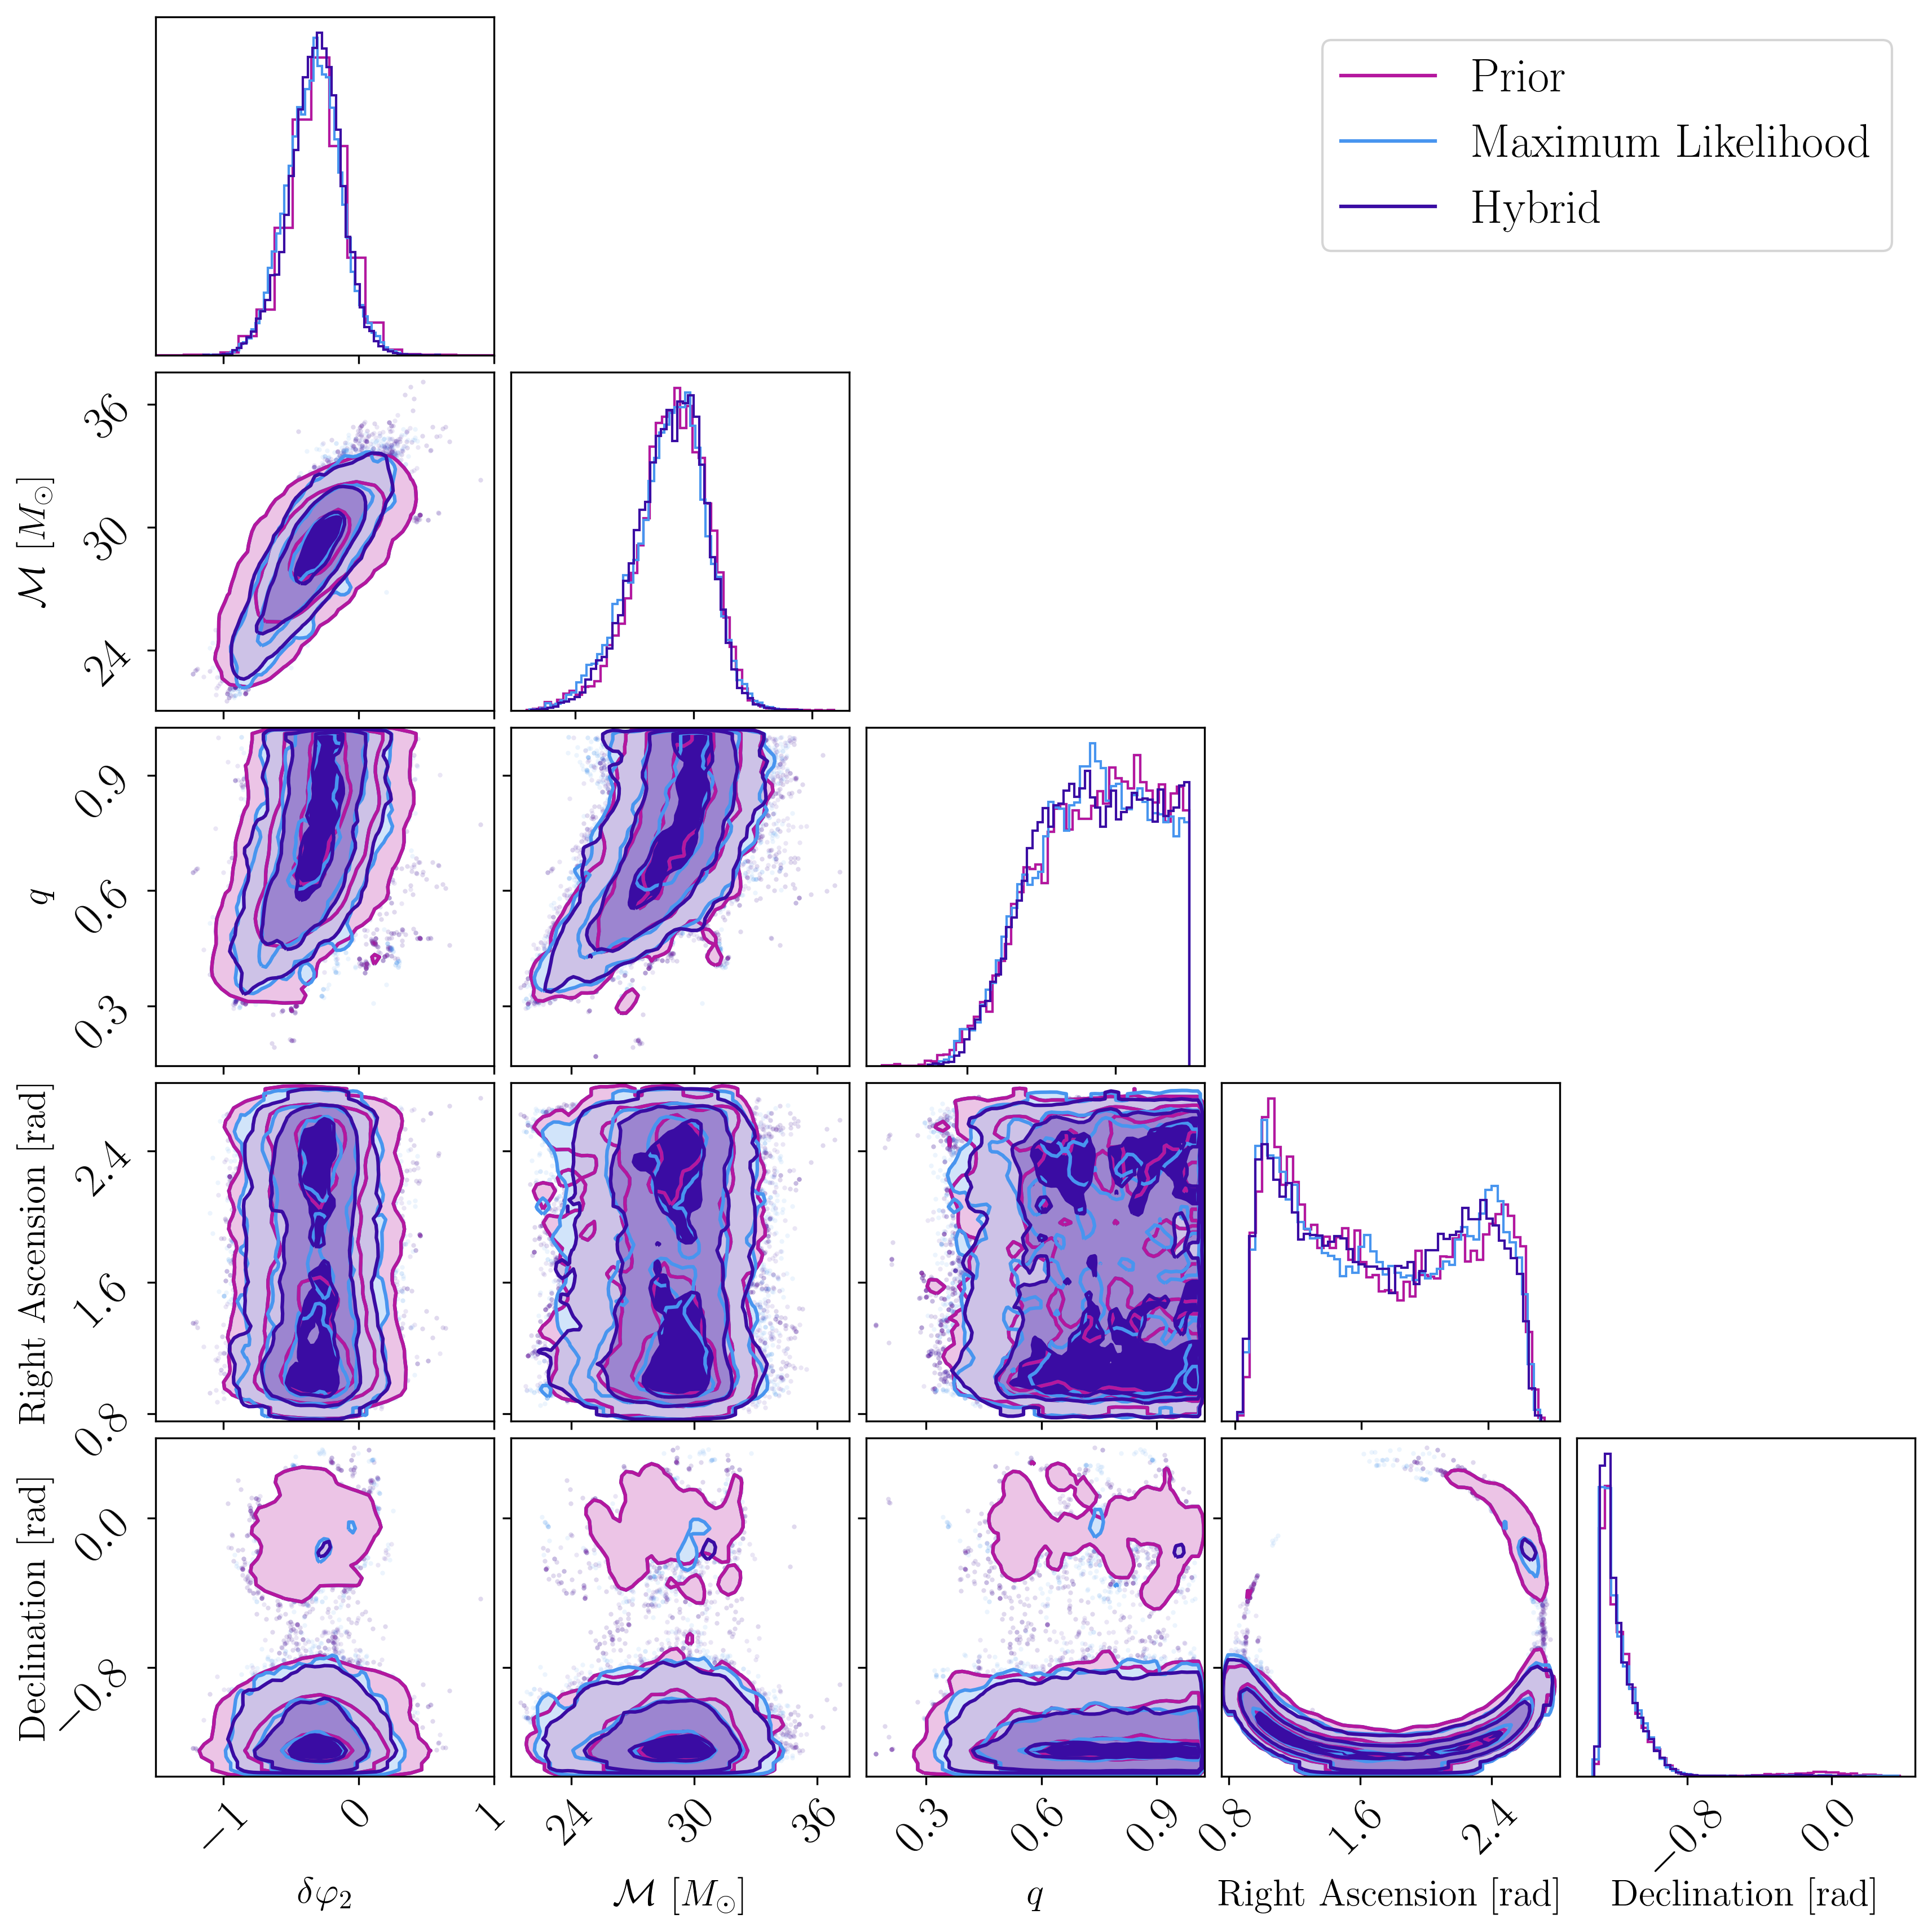

In [18]:
fig = bilby.core.result.plot_multiple(
    [res_prior, res_maxlike, res_hybrid],
    labels = ["Prior", "Maximum Likelihood", "Hybrid"],
    titles = False,
    parameters = ["d_phi_2", "chirp_mass", "mass_ratio", "ra", "dec"],
    corner_labels = [
        dpi_key_to_label("d_phi_2"),
        r"$\mathcal{M}$ [$M_{\odot}$]",
        r"$q$",
        "Right Ascension [rad]", 
        "Declination [rad]",
    ],
    colours = [HYBRID_OVERLAP0_COLOR, COMP_COLOR, HYBRID_COLOR],
    quantiles = None
)

for i in range(5):
    fig.get_axes()[5*i].set_xlim(-1.5,1)

fig.savefig("./figures/ptemcee_initialization_comparison_corner.pdf")